<a href="https://colab.research.google.com/github/Rmohanty385/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**





*   One of the biggest challenges faced in the bike-sharing system is the unavailability or shortage of bike. This issue has attracted numerous researchers to predict the demand of bike-sharing so that the company is able to redistribute the bikes efficiently and accurately.
*   Correctly predicting the count of the bikes can be challenging especially when the data collected are often imbalance . Moreover, despite the several efforts to train models to predict the demand, there is no consensus on which machine learning techniques that will provide the best performance due to the different features applied.
*   Rental bikes is a multi-billion dollar industry, whose popularity is increasing among masses for short distance travelling within cities.To keep up with the demand,it is important to predict the demand for rented bikes per hourly basis to increase the customer satisfaction by reducing the waiting time thus giving an edge over other competitors.
*   In this project we have built various regression models to predict the demand for rented bikes.Models used are Linear regression with lasso and ridge regularization,Decision tree,Random forest,Gradient Boosting and XG Boosting.Based on the R2 score,we have found Gradient Boosting model the most accurate model.Gradient Boosting seems to have generalised well on the given data.





# **GitHub Link -**

https://github.com/Rmohanty385/Bike-Sharing-Demand-Prediction-

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

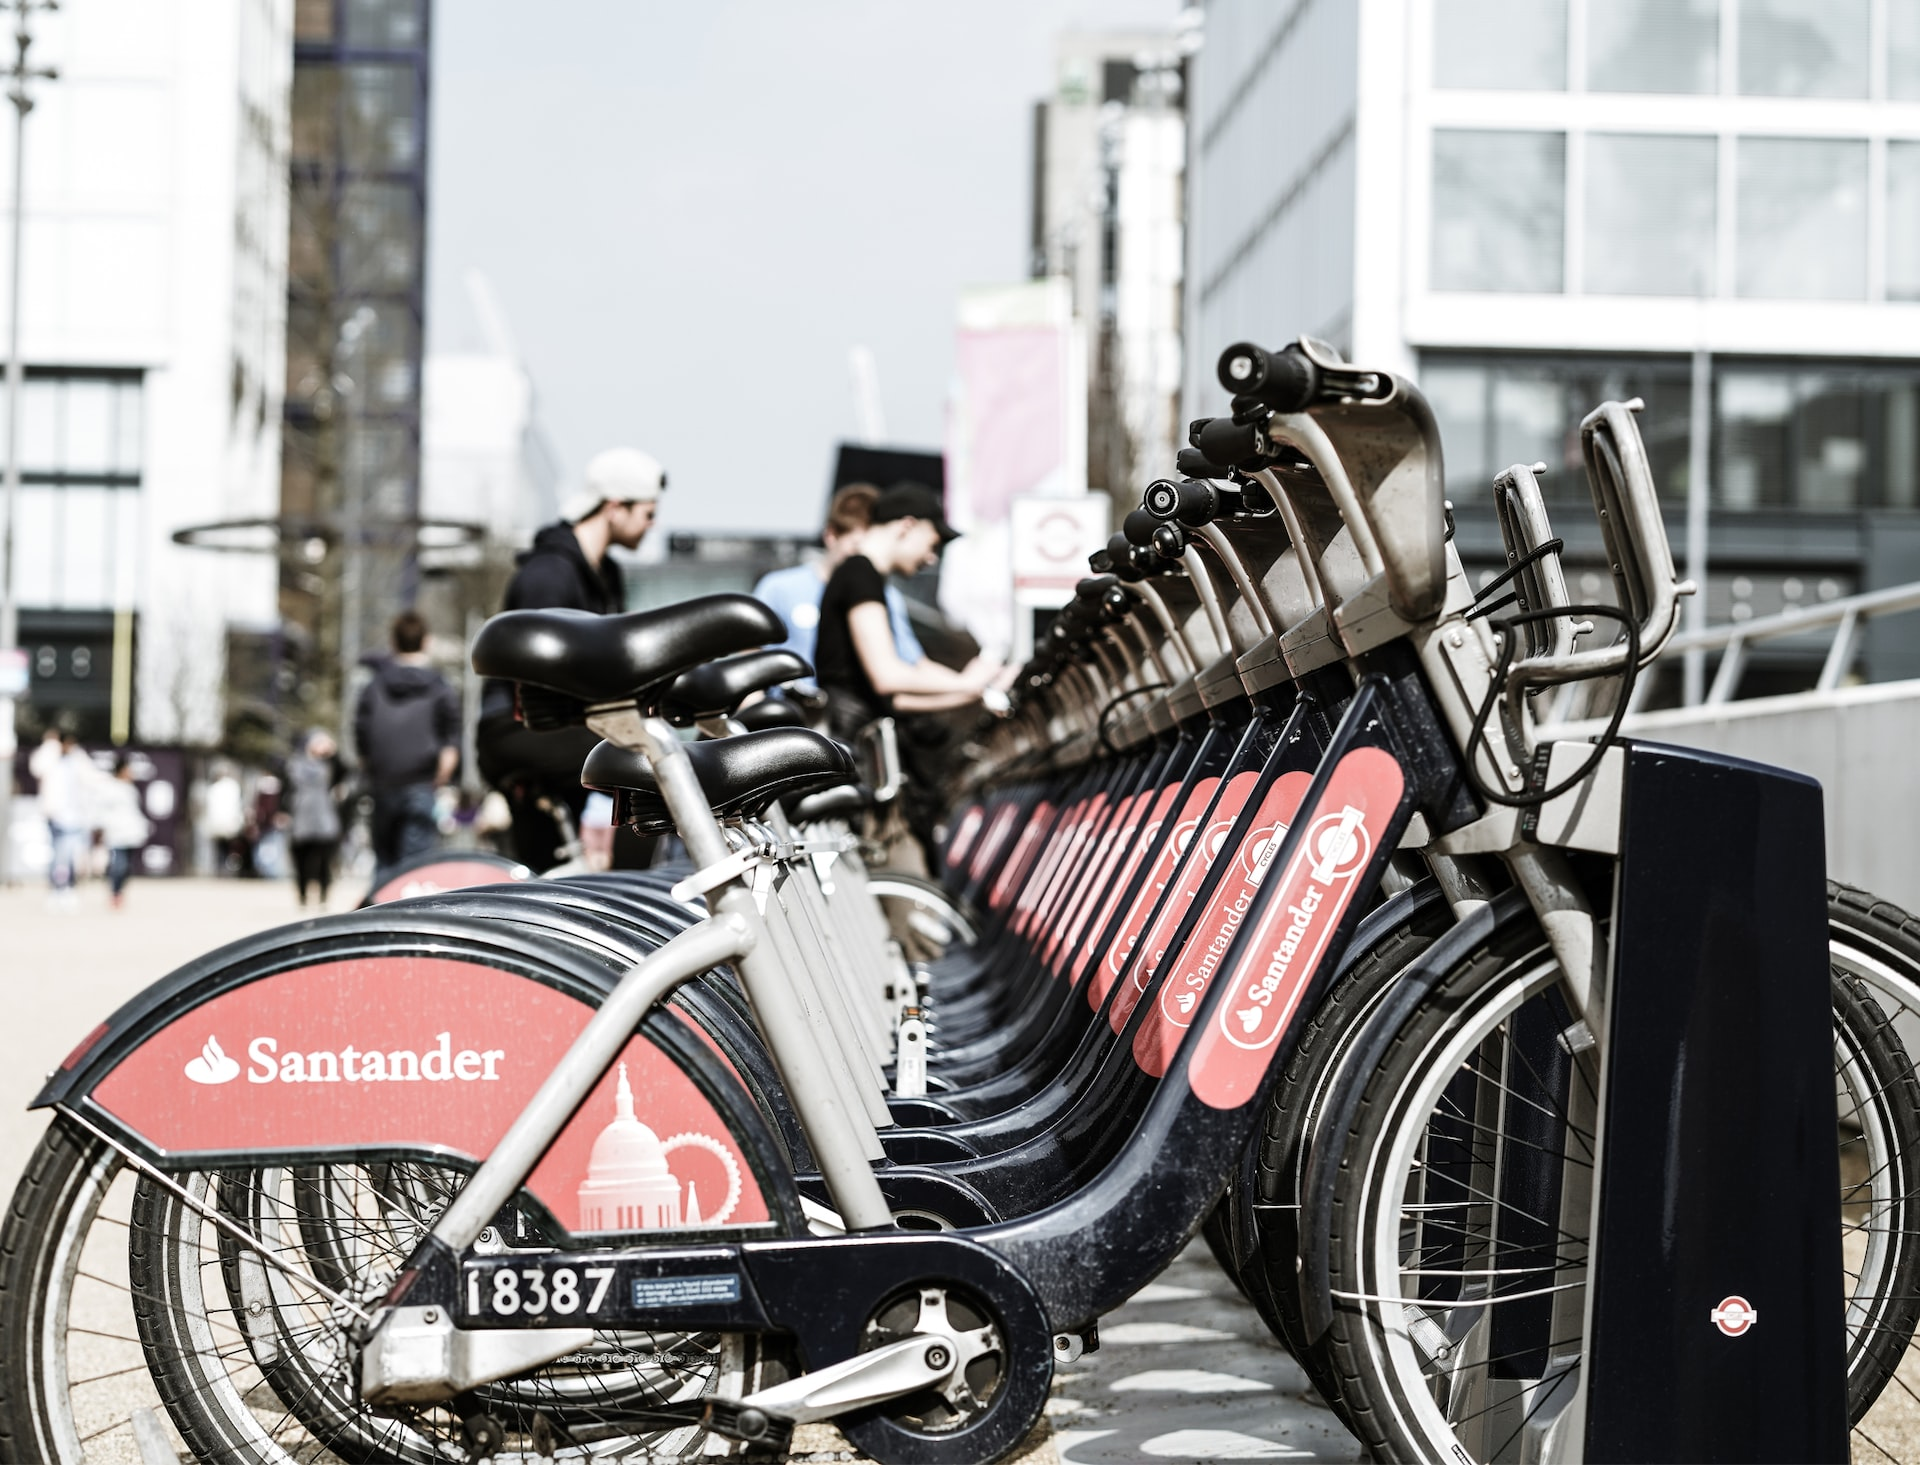

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
data='/content/SeoulBikeData.csv'
df = pd.read_csv(data, encoding = "ISO-8859-1")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows=df.shape[0]
columns=df.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

### Dataset Information

In [ ]:
# Dataset Info
df.info()

In [ ]:
# Renaming columns to remove units 
df = df.rename(columns={'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_radiation','Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'})

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {df.duplicated().sum()}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.There are 8760 rows and 14 columns.There are no null values and no duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 



### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

def visibility_binning(x):
 '''Creates bins for visibility feature'''
 try: 
    if x['Visibility']<=500:
      return 'Heavy_snow'
    elif x['Visibility']<1000:
      return 'Medium_snow'
    else:
      return 'Light_snow'
 except:
    print('Check your code')    

In [ ]:
# Binning numerical features Visibility,Rainfall and Windspeed
df['Binned_visibity'] = df.apply(lambda x:visibility_binning(x),axis=1)

In [ ]:
# Dropping columns Visibility
df.drop(columns=['Visibility'],axis=1,inplace=True)

# Dropping snowfall column as it has relationship with visibility. As snowfall is high,visibility is less and vice versa
df.drop(columns=['Snowfall'],axis=1,inplace=True)

In [ ]:
# extracting day,month, day of week,day_name and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
# Checking value counts for categorical columns
df['Seasons'].value_counts()

In [ ]:
# Checking value counts for categorical columns
df['Holiday'].value_counts()

In [ ]:
# Checking value counts for categorical columns
df['Month'].value_counts()

In [ ]:
# Checking value counts for categorical columns
df['weekdays_weekend'].value_counts()

In [ ]:
# Barplot between 'Functioning_day' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Functioning_day'],y=df['Rented_bike_count']);

In [ ]:
# Taking only functioning days into account.Hence dropping 295 rows 
df = df[df['Functioning_day']=='Yes']

# Dropping 'Functioning_day' feature as it is no point keeping 'Yes' category in categorical column.
df.drop(columns=['Functioning_day'],axis=1,inplace=True)

In [ ]:
# Creating numeric features list from dataset
num_features = df.describe().columns.to_list()

# Deleting 'Month' and 'Is_weekend' from num_features as they are categorical features
del num_features[-1:-3:-1]

# Creating categorical features list from dataset
cat_features = set(df.columns)-set(num_features)

print(f'Numeric features are {num_features}')
print(f'Categorical features are {cat_features}')

### What all manipulations have you done and insights you found?


*   Visibility and Snowfall have a relationship that if the snowfall is heavy then visibility is low which leads to less rental_bike_count.Similarly if the snowfall is less then visibility is high which increases rental_bike_count.Hence visibility is binned into High snowfall, Medium snowfall and Low snowfall.
*   Date column was used to extract month,weekend_or_not features to check to check variations with respect to target variable as per seasons.
*   Categorical features do not have class imbalance, every category in the features were represented properly.
*   Taking only functioning days into account as on non-function days zero bikes are rented which is off no use to us.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **1. Plotting barplot for each 'categorical variable' with respect to the target variable 'rental_bike_count'**

In [ ]:
# Barplot between 'Month' and 'Rented_bike_count'
plt.figure(figsize=(14,7))
sns.barplot(x=df['Month'],y=df['Rented_bike_count']);

In [ ]:
# Barplot between 'Is_weekend' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['weekdays_weekend'],y=df['Rented_bike_count']);

In [ ]:
# Barplot between 'Holiday' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Holiday'],y=df['Rented_bike_count']);

In [ ]:
# # Barplot between 'Seasons' and 'Rented_bike_count'
plt.figure(figsize=(12,7))
sns.barplot(x=df['Seasons'],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?



*   From March bike rent count increases and it was highest in June.
*   Bike rented were more or less same on weekdays and weekends.
*   Bike rented on 'No Holiday' were more than on 'Holidays'.
*   In summer season most bikes were rented and in winter least bikes were rented




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



*   Bikes rented are more on 'No Holiday' as people travel to reach their offices.This gives an indication to open bike rental outlets near railway stations where people need to travel further using buses from the railway station to reach their offices.

*   People don't like to rent bikes in winter season due to snowfall and rainfall.



##**2. Plotting boxplot to check outliers between categorical variables**

In [ ]:
# Plotting boxplot for categorical features
for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df['Rented_bike_count']);

In [ ]:
# Plotting boxplot 
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Hour'],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

Boxplot is used to check the outliers

##### 2. What is/are the insight(s) found from the chart?



*   Except for feature 'Hour' every other categorical feature has outliers.
*   We will deal with it later.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##**3. Plotting regreesion plot between 'Numeric features' and target variable 'Rented_bike_count'**

In [ ]:
# Plotting regression line between 'Numeric features' and 'Rented_bike_count' to check linearity
for col in num_features[1:]:
 plt.figure(figsize=(20,10))
 sns.regplot(x=df[col],y=df['Rented_bike_count'],line_kws={'color':'black'})

##### 1. Why did you pick the specific chart?

Regression plot is plotted between continuous variables to check wheather linearity exist or not and tries to fit the best line possible.

##### 2. What is/are the insight(s) found from the chart?



*   Some kind of linearity exists between 'rented_bike_count' and 'temperature'.As temperature increases rented_bike_count also increases. People don't like to rent bike in cold temperatures which is shown above where rented_bike_count is less in winter.
*   Very little linearity exist between 'rented_bike_count' and 'humidity', 'solar_radiation' and 'wind_speed'.
*   Some linearity exist between 'rented_bike_count' and 'dew_point_temperature' , Same relationship as temperature.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



*   Only temperature, dew_point_temperature shows some kind of linear relationship.
*   Every other column is not linearly dependent on target variable.
*   Thus linear model will have less accuracy as only few columns show linear relationship.




##**4. Plotting Pointplot to check variation of 'rented_bike_count' with respect to 'hour of the day' taking categorical columns into consideration.**

In [ ]:
# Plotting a point plot to check variation of rented_bike_count with respect to Hours
for col in cat_features:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=df['Hour'],y=df['Rented_bike_count'],hue=df[col])

##### 1. Why did you pick the specific chart?

Point plot helps to visualize the trends in 'rented_bike_count' per hour basis with respect to different categorical columns

##### 2. What is/are the insight(s) found from the chart?



*   It is clear that maximum bikes are rented during office opening and closing hrs.

*   Maximum bikes are rented during night time from 5PM to 10PM.Same trend as be observed in different seasons(winter having the lowest bike rental counts),across months,across non holidays and across weekends.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Best time for bike rental business is during summer season from 5PM to 10PM during the night time.

#**5. Plotting barplot to visualize how 'snowfall' affects 'rented_bike_count'**

In [ ]:
# Creating df to get median of rented_bike_count based on visibility
visibility_df = df.groupby(['Binned_visibity'])['Rented_bike_count'].median().reset_index().sort_values(['Rented_bike_count'],ascending=False)

# Plotting barplot to visualize
plt.figure(figsize=(14,7))
plt.bar(x=visibility_df['Binned_visibity'],height=visibility_df['Rented_bike_count']);

##**6. Plotting lineplot to visualize the trends in rented_bike_count'**

In [ ]:
# Plotting lineplot to observe trend
for col in num_features[1:]:
 plt.figure(figsize=(15,10))
 df.groupby(col)['Rented_bike_count'].median().plot()
 plt.ylabel('Rented_bike_count')

##### 1. Why did you pick the specific chart?

Line chart helps to visualize the trends in features

##### 2. What is/are the insight(s) found from the chart?

*   Bike rentals increases during night time.
*   People prefer temperature ranges of (20 to 30) for renting bikes.Very cold temperatures has less rented_bike counts and after 30 there is a decreasing trend.
*   Humidity and Rainfall has a decreasing trend. 
*   There is no such significant relation between rented_bike_count and solar radiation,wind speed.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



*   Temperature is the most important feature with positive trend.
*   Humidity and rainfall have negative trend.
*   Solar radiation and wind speed are least important feature.



##**6. Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

##### 1. Why did you pick the specific chart?

Heatmap helps to visualize the Pearsons correlation coeffient properly

##### 2. What is/are the insight(s) found from the chart?


*   'Temperature' and 'Dew_point_temperature' are highly correlated.
*   'Humidity' and 'Dew_point_temperature','Humidity' and 'Solar Radiation' are highly correlated to eachother.
*   Target variable 'Rented_bike_count' is highly correlated to 'hour' and 'temperature' which means these are important features.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   When temperature is in the range of 20 to 30, average rented_bike_count in an hour is greater than 1000.
*   When humidity is greater than 60, average rented_bike_count in an hour is less than 500.
*   When rainfall is greater than 10, average rented_bike_count in an hour is less than 100.



In [ ]:
# Importing libraries
from scipy.stats import *
import math

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

When temperature is in the range of 20 to 30,average rented_bike_count in an hour is greater than 1000.

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: N = 1000

Alternate Hypothesis : N > 1000

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=df[(df['Temperature'] >= 20) & (df['Temperature'] <= 30)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 1000
sample_mean = hypo_1['Rented_bike_count'].mean()
size = len(hypo_1)
std=(variance(hypo_1['Rented_bike_count']))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col='Rented_bike_count')
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0

##### Which statistical test have you done to obtain P-Value?

We have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.So rented_bike_count is higher than 1000 during temperature range of 20 to 30.So this temperature range is ideal for people for renting bikes

##### Why did you choose the specific statistical test?

Rented_bike_count is approx normally distributed

### Hypothetical Statement - 2

When humidity is greater than 60,average rented_bike_count is less than 500.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 500

Alternate Hypothesis : N < 500

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3=df[df['Rainfall'] >= 10]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 100
sample_mean = hypo_3['Rented_bike_count'].mean()
size = len(hypo_3)
std=(variance(hypo_3['Rented_bike_count']))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_3,col='Rented_bike_count')
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

We have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been failed to be rejected. So rented_bike_count is higher than 100 for rainfall greater than 10. Hence rainfall has not that harsh effect on rented_bike_count

##### Why did you choose the specific statistical test?

Rented_bike_count is approx normally distributed

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There were no missing values in the dataset

### 2. Handling Outliers

In [ ]:
# Plotting distribution plot and boxplot for all numerical column
for col in num_features:
 f, axes = plt.subplots(1, 2,figsize=(15,8))
 sns.distplot(x=df[col],color='blue',ax=axes[0])
 sns.boxplot(x=df[col],color='blue',ax=axes[1])

In [ ]:
# Plotting histogram of numerical features
for col in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.histplot(x=df[col],color='blue',ax=ax,bins=50)
    
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**Checking distribution of target variable 'Rented_bike_count'**

In [ ]:
# Plotting distribution plot and boxplot of 'Rented_bike_count'
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_bike_count'],color='blue',ax=axes[0])
sns.boxplot(x=df['Rented_bike_count'],color='blue',ax=axes[1]);

**Removing outliers based on quartiles and IQR**

In [ ]:
# Removing outliers based on IQR as it is a skewed distribution

# Calucating IQR
IQR = df['Rented_bike_count'].quantile(0.75)-df['Rented_bike_count'].quantile(0.25)

# Calculating Lower and Upper bounds
lower_bridge = df['Rented_bike_count'].quantile(0.25) - IQR*(1.5)
upper_bridge = df['Rented_bike_count'].quantile(0.75) + IQR*(1.5)

# Removing outliers
df = df[df['Rented_bike_count'] <= upper_bridge]

Taking sqaure root of feature 'rented_bike_count' to check distribution is normal or not

In [ ]:
# Plotting distribution plot and boxplot of 'Rented_bike_count'
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_bike_count']),color='blue',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_bike_count']),color='blue',ax=axes[1]);

##### What all outlier treatment techniques have you used and why did you use those techniques?





*   Outliers are removed based on IQR
*   Taking square root of target variable 'rented_bike_count' completely removed the skewness and made approx normal distribution.We will transform the feature in further steps



### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Creating One_Hot_Encoding for 'Seasons' feature
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

# Using binary label encoding for 'Holiday' feature. Holiday=1 and No_holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

# Using label encoding for 'binned_visibility' feature. Light_snow=2,Medium_snow=1,Heavy_snow=0
df['Binned_visibity']=df['Binned_visibity'].map({'Light_snow':2,'Medium_snow':1,'Heavy_snow':0})

What all categorical encoding techniques have you used & why did you use those techniques?

#### What all categorical encoding techniques have you used & why did you use those techniques?

*   One Hot Encoding:To encode more than 2 nominal categories in a feature this method is used.To avoid the problem of dummy trap one column is dropped to reduce multi-collinearity.
*   Binary label encoding:To label yes or no types of values in a feature.
*   Label encoding:To encode ordinal categories in a feature, this method is used.



### 4. Feature Manipulation & Selection

**1. Feature selection based on Pearsons correlation coefficient**

In [ ]:
# Visualizing correlation values
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

**From this we can see that**



*   'Dew_point temperature' as high correlation with 'Temperature'.
*   'Solar_radiation' and 'Dew_point temperature' has high correlation with 'Humidity'
*   Hence from this Peasons coefficient, 'Dew_point temperature' and 'Solar_radiation' should be dropped.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***